# DECLINE CURVE ANALYSIS

In [ ]:
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 951, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 951 (delta 16), reused 28 (delta 10), pack-reused 915 (from 1)
Receiving objects: 100% (951/951), 24.45 MiB | 16.19 MiB/s, done.
Resolving deltas: 100% (505/505), done.


In [ ]:
# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import missingno as msno

sys.path.append("/content/pyreservoir/dca")
from dca import remove_outlier, arps_fit

## 5a Outlier detection and smoothing

In [ ]:
# Production data link (same as session 2)
path = "http://bit.ly/piopetro-data1"

In [ ]:
# Read data
df = pd.read_csv(path)

df.head()

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,07-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
1,08-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
2,09-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
3,10-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
4,11-Apr-14,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production


In [ ]:
# Convert date column to pandas datetime format
df["DATEPRD"] = pd.to_datetime(df["DATEPRD"], format="%d-%b-%y")

df.head()

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
4,2014-04-11,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production


In [ ]:
# Select well 15/9-F-14 (Don't forget to reset index)
df = df[df["NPD_WELL_BORE_NAME"]=="15/9-F-14"].reset_index()

# Dataframe only has 2 columns of interest: time and rate
df = df[["DATEPRD", "BORE_OIL_VOL"]]

df.head()

,DATEPRD,BORE_OIL_VOL
0,2008-02-12,0.0
1,2008-02-13,0.0
2,2008-02-14,0.0
3,2008-02-15,0.0
4,2008-02-16,0.0


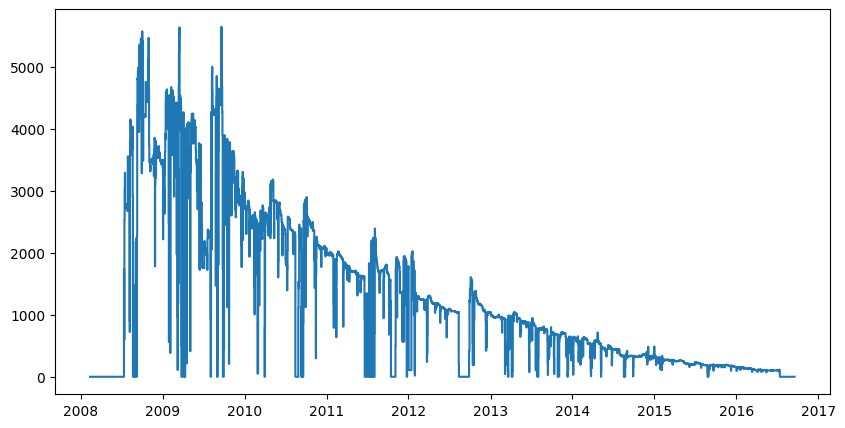

In [ ]:
# Plot oil production rate
plt.figure(figsize=(10,5))
plt.step(df["DATEPRD"], df["BORE_OIL_VOL"])
plt.show()

In [ ]:
# Removing outliers (window=150, num_stdev=50)
df2 = remove_outlier(df, "BORE_OIL_VOL", 50, 50, trim=True)

df2.head()

,DATEPRD,BORE_OIL_VOL,BORE_OIL_VOL_rol_Av,BORE_OIL_VOL_rol_Std,BORE_OIL_VOL_is_Outlier
0,2008-11-01,4645.0,4016.40,593.445732,False
1,2008-11-02,3732.0,4009.00,593.123727,False
2,2008-11-03,3476.0,4001.48,592.919798,False
3,2008-11-04,3461.0,3953.06,670.047802,False
4,2008-11-05,3458.0,3930.94,679.680219,False


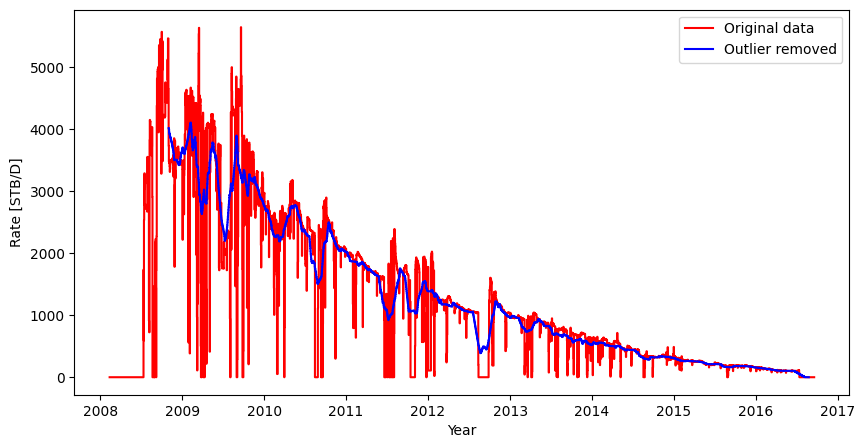

In [ ]:
# Plot outlier-removed oil production rate, compare w/ original
plt.figure(figsize=(10,5))

plt.step(df["DATEPRD"], df["BORE_OIL_VOL"], color="red", label="Original data")
plt.step(df2["DATEPRD"], df2["BORE_OIL_VOL_rol_Av"], color="blue", label="Outlier removed")
plt.xlabel("Year"); plt.ylabel("Rate [STB/D]")

plt.legend()
plt.show()

## 5b Traditional DCA - Part 1

In [ ]:
# Define time and production rate (from outlier-removed dataframe)
t = df2["DATEPRD"]
q = df2["BORE_OIL_VOL_rol_Av"]

In [ ]:
import datetime

# subtract one datetime to another datetime
timedelta = [j-i for i, j in zip(t[:-1], t[1:])]
timedelta = np.array(timedelta)
timedelta = timedelta / datetime.timedelta(days=1)

# take cumulative sum over timedeltas
t = np.cumsum(timedelta)
t = np.append(0, t)
t = t.astype(float)

print(t)

[0.000e+00 1.000e+00 2.000e+00 ... 2.851e+03 2.852e+03 2.853e+03]


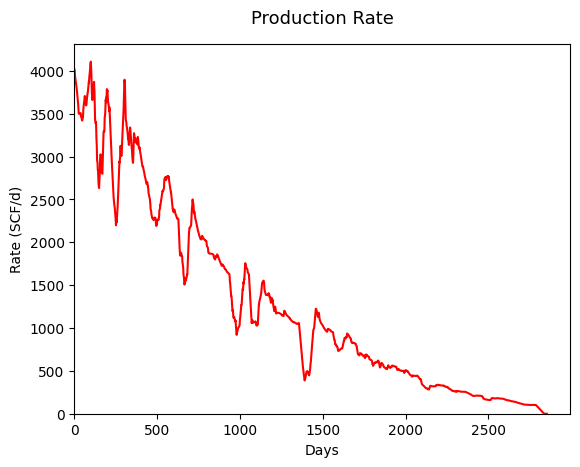

In [ ]:
plt.plot(t, q, color='red')
plt.title('Production Rate', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Rate (SCF/d)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

plt.show()

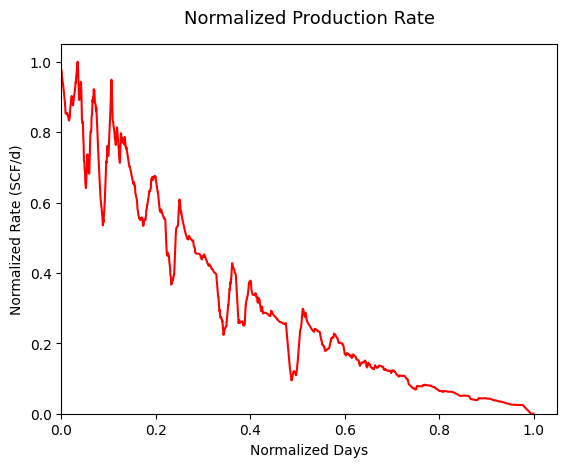

In [ ]:
# normalize the time and rate data
t_normalized = t / max(t)
q_normalized = q / max(q)

plt.plot(t_normalized, q_normalized, color='red')
plt.title('Normalized Production Rate', size=13, pad=15)
plt.xlabel('Normalized Days')
plt.ylabel('Normalized Rate (SCF/d)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

plt.show()

In [ ]:
# function for hyperbolic decline
def hyperbolic(t, qi, di, b):
  return qi / (np.abs((1 + b * di * t))**(1/b))


In [ ]:
# fitting the data with the hyperbolic function
from scipy.optimize import curve_fit

popt, pcov = curve_fit(hyperbolic, t_normalized, q_normalized)


In [ ]:
qi, di, b = popt

print(qi, di, b)

0.934277563106289 2.2867068475901675 -0.2872863623340193


In [ ]:
# de-normalize qi and di
qi = qi * max(q)
di = di / max(t)

print('Initial production rate:', np.round(qi, 3), 'STB')
print('Initial decline rate:', np.round(di, 5), 'STB/D')
print('Decline coefficient:', np.round(b, 5))


Initial production rate: 3835.957 STB
Initial decline rate: 0.0008 STB/D
Decline coefficient: -0.28729


Initial production rate (qi)  : 3835.95682 VOL/D
Initial decline rate (di)     : 0.00080 VOL/D
Decline coefficient (b)       : -0.28729
RMSE of regression            : 0.00753


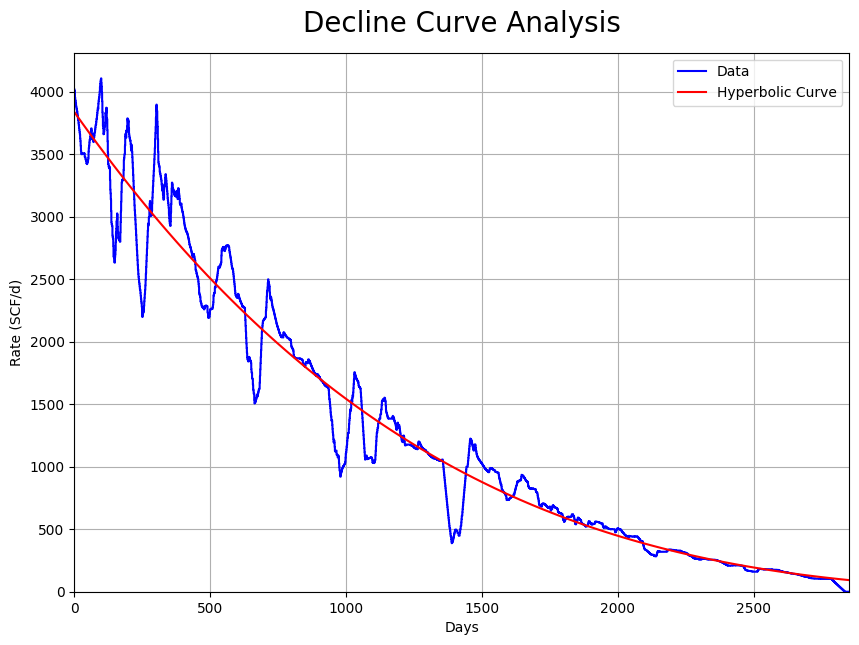

(np.float64(3835.9568186018014),
 np.float64(0.0008015095855556143),
 np.float64(-0.2872863623340193),
 np.float64(0.007526804753207745))

In [ ]:
t = df2["DATEPRD"]
q = df2["BORE_OIL_VOL_rol_Av"]

# Decline curve analysis
arps_fit(t, q, plot=True)

## 5c Traditional DCA - Part 2

In [ ]:
# function for hyperbolic cumulative production
def cumpro(q_forecast, qi, di, b):
  return (((qi**b) / ((1 - b) * di)) * ((qi ** (1 - b)) - (q_forecast ** (1 - b))))

In [ ]:
# forecast gas rate until 5,000 days
t_forecast = np.arange(5000)
q_forecast = hyperbolic(t_forecast, qi, di, b)


# forecast cumulative production until 5,000 days
Qp_forecast = cumpro(q_forecast, qi, di, b)

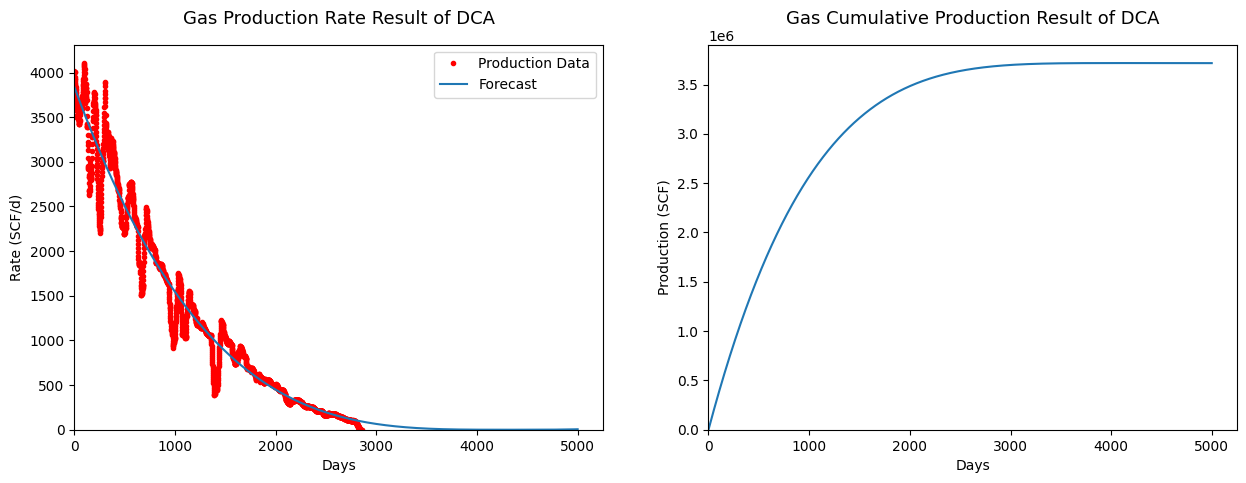

In [ ]:
# plot the production data with the forecasts (rate and cum. production)
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
plt.plot(t, q, '.', color='red', label='Production Data')
plt.plot(t_forecast, q_forecast, label='Forecast')
plt.title('Gas Production Rate Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Rate (SCF/d)')
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.legend()


plt.subplot(1,2,2)
plt.plot(t_forecast, Qp_forecast)
plt.title('Gas Cumulative Production Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Production (SCF)')
plt.xlim(xmin=0); plt.ylim(ymin=0)


plt.show()

## 5d Data-driven DCA - Part 1

In [ ]:
# Read data
df = pd.read_csv(path)

# Convert date column to pandas datetime format
df["DATEPRD"] = pd.to_datetime(df["DATEPRD"], format="%d-%b-%y")

df.head()

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
4,2014-04-11,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production


In [ ]:
df.columns

Index(['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND'],
      dtype='object')

In [ ]:
# # Select well 15/9-F-14 (Don't forget to reset index)
# df = df[df["NPD_WELL_BORE_NAME"]=="15/9-F-14"].reset_index()

# df.head()

In [ ]:
features_used = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
       'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL']

df_filter = df[features_used]

df_filter.head()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL
0,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0
1,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.00,0.000,0.0
2,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.00,0.000,0.0
3,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.00,0.000,0.0
4,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0


In [ ]:
df_clean = df_filter.dropna()

df_clean

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL
0,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.000,0.000,0.0
4,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.480,33.072,0.0
5,0.0,303.501,96.923,281.447,0.0,3.08702,22.053,8.704,22.053,0.0
6,0.0,303.535,96.959,276.032,0.0,1.96237,27.503,9.423,16.163,0.0
7,0.0,303.782,96.969,282.787,0.0,0.00000,20.996,8.131,20.737,0.0
...,...,...,...,...,...,...,...,...,...,...
8996,0.0,345.907,90.034,345.907,0.0,0.99925,0.000,0.000,13.974,0.0
8997,0.0,345.907,90.034,345.907,0.0,1.04949,0.000,0.000,14.063,0.0
8998,0.0,345.907,90.034,345.907,0.0,0.97485,0.000,0.000,14.174,0.0
8999,0.0,345.907,90.034,345.907,0.0,0.96874,0.000,0.000,14.233,0.0


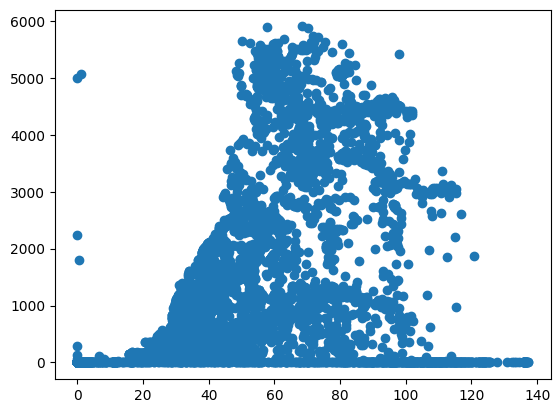

In [ ]:
x = df['AVG_WHP_P']
y = df['BORE_OIL_VOL']

plt.scatter(x, y)

In [ ]:
target = 'BORE_OIL_VOL'

X = df_clean.drop(columns=target)
y = df_clean[target]

y

,BORE_OIL_VOL
0,0.0
4,0.0
5,0.0
6,0.0
7,0.0
...,...
8996,0.0
8997,0.0
8998,0.0
8999,0.0


In [ ]:
# Step 1. Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                      test_size=0.2, random_state=42)

# Step 2. Scaling from 0 to 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Step 3. Build model
# RandomForestRegressor, SVR (Support Vector Machine), Ensemble
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)

y_pred

array([1273.23,  186.64,  190.82, ..., 4099.01,  391.58,  433.99])

In [ ]:
from sklearn.metrics import r2_score

# Predict with model on test set
y_pred = model.predict(X_test)

prediction = y_pred
true = y_test.values

# Measure accuracy
r2 = r2_score(true, prediction)
print(r2)

0.9884230964189222


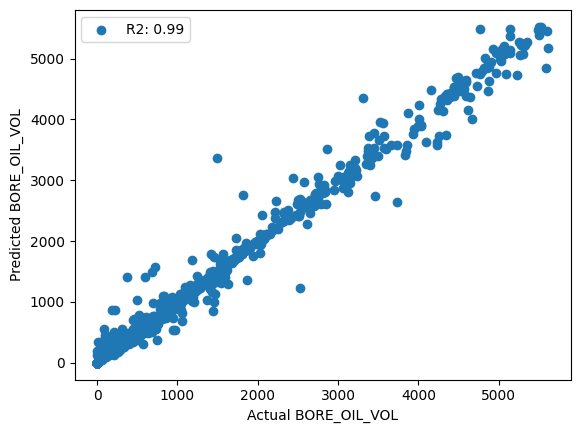

In [ ]:
# Crossplot
plt.scatter(true, prediction, label=f'R2: {r2:.2f}')
plt.xlabel('Actual BORE_OIL_VOL')
plt.ylabel('Predicted BORE_OIL_VOL')

plt.legend()

## 5e Data-driven DCA - Part 2

Predict on one well

In [ ]:
df['NPD_WELL_BORE_NAME'].unique()

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D',
       '15/9-F-4', '15/9-F-5'], dtype=object)

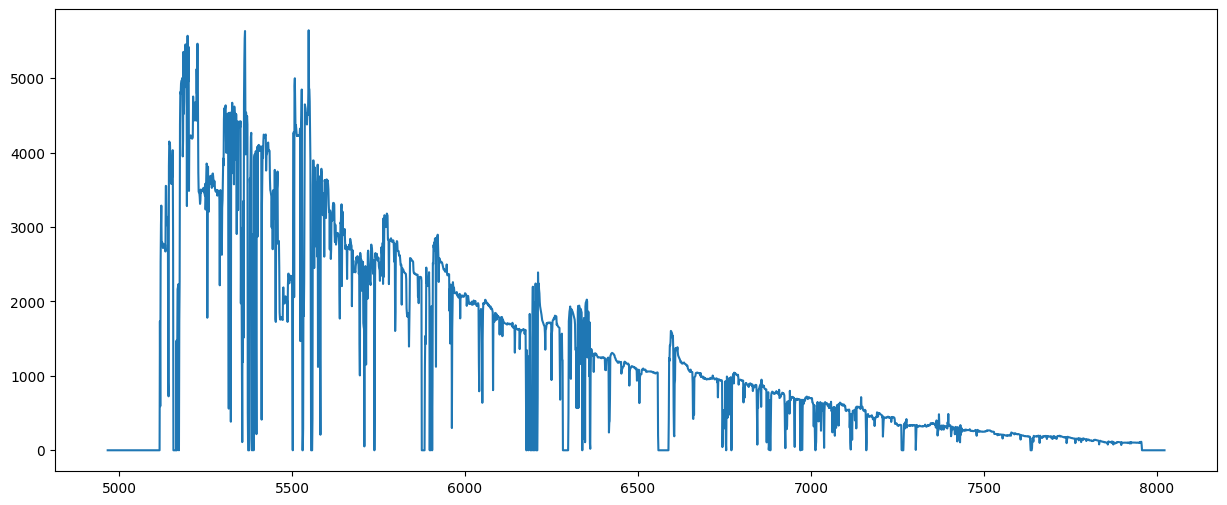

In [ ]:
df_well = df[df['NPD_WELL_BORE_NAME']=='15/9-F-14']

plt.figure(figsize=(15,6))
plt.plot(df_well['BORE_OIL_VOL'])

In [ ]:
features_used = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
       'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL']

df_well_predict = df_well[features_used]

df_well_predict

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
4967,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.059,0.0,0.0,0.0
4968,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.068,0.0,0.0,0.0
4969,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.050,0.0,0.0,0.0
4970,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.066,0.0,0.0,0.0
4971,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.105,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8018,0.0,0.0,0.0,10.873,10.583,0.94937,10.873,0.0,8.894,0.0,0.0,0.0
8019,0.0,0.0,0.0,10.877,10.583,1.11452,10.877,0.0,8.888,0.0,0.0,0.0
8020,0.0,0.0,0.0,10.883,10.582,1.00047,10.883,0.0,8.856,0.0,0.0,0.0
8021,0.0,0.0,0.0,10.879,10.583,1.16066,10.879,0.0,8.839,0.0,0.0,0.0


In [ ]:
target = 'BORE_OIL_VOL'

X_test = df_well_predict.drop(columns=target)
y_test = df_well_predict[target]

In [ ]:
y_pred = model.predict(X_test)

y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
df_well['BORE_OIL_VOL_PRED'] = y_pred

df_well

/tmp/ipython-input-86-652669437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_well['BORE_OIL_VOL_PRED'] = y_pred


,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,BORE_OIL_VOL_PRED
4967,2008-02-12,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.059,0.0,0.0,0.0,NaN,production,0.0
4968,2008-02-13,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.068,0.0,0.0,0.0,NaN,production,0.0
4969,2008-02-14,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.050,0.0,0.0,0.0,NaN,production,0.0
4970,2008-02-15,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.066,0.0,0.0,0.0,NaN,production,0.0
4971,2008-02-16,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.105,0.0,0.0,0.0,NaN,production,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,2016-09-13,15/9-F-14,0.0,0.0,0.0,10.873,10.583,0.94937,10.873,0.0,8.894,0.0,0.0,0.0,NaN,production,0.0
8019,2016-09-14,15/9-F-14,0.0,0.0,0.0,10.877,10.583,1.11452,10.877,0.0,8.888,0.0,0.0,0.0,NaN,production,0.0
8020,2016-09-15,15/9-F-14,0.0,0.0,0.0,10.883,10.582,1.00047,10.883,0.0,8.856,0.0,0.0,0.0,NaN,production,0.0
8021,2016-09-16,15/9-F-14,0.0,0.0,0.0,10.879,10.583,1.16066,10.879,0.0,8.839,0.0,0.0,0.0,NaN,production,0.0


In [ ]:
df_well[['DATEPRD', 'BORE_OIL_VOL', 'BORE_OIL_VOL_PRED']]

,DATEPRD,BORE_OIL_VOL,BORE_OIL_VOL_PRED
4967,2008-02-12,0.0,0.0
4968,2008-02-13,0.0,0.0
4969,2008-02-14,0.0,0.0
4970,2008-02-15,0.0,0.0
4971,2008-02-16,0.0,0.0
...,...,...,...
8018,2016-09-13,0.0,0.0
8019,2016-09-14,0.0,0.0
8020,2016-09-15,0.0,0.0
8021,2016-09-16,0.0,0.0


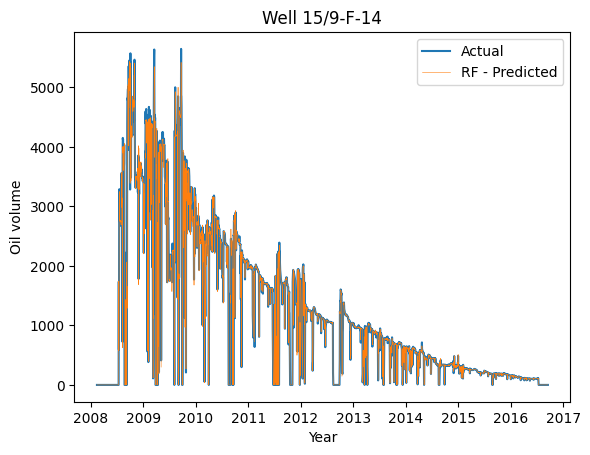

In [ ]:
plt.plot(df_well['DATEPRD'], df_well['BORE_OIL_VOL'], label='Actual')
plt.plot(df_well['DATEPRD'], df_well['BORE_OIL_VOL_PRED'], lw=0.4, label='RF - Predicted')
plt.xlabel('Year')
plt.ylabel('Oil volume')
plt.title('Well 15/9-F-14')
plt.legend()
plt.show()